<a href="https://colab.research.google.com/github/ShriyaAvasthi/Algorithms-specilisation--Stanford-online-coursera/blob/master/AEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMAGE DENOISING WITH AUTOENCODERS**

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical
%matplotlib inline


DATA PREPROCESSING



In [ ]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.

x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))


11493376/11490434 [==============================] - 0s 0us/step


ADDING NOISE

In [ ]:
x_train_noisy = x_train + np.random.rand(60000, 784)*0.9
x_test_noisy = x_test + np.random.rand(10000, 784)*0.9

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

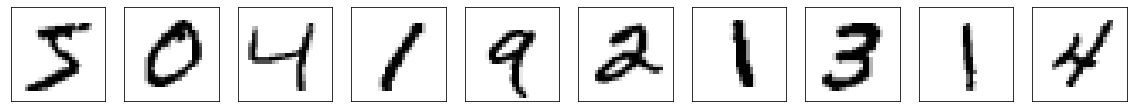

In [ ]:
def plot(x, p, labels = False):
  plt.figure(figsize=(20,2))
  for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x[i].reshape(28,28), cmap='binary')
    plt.xticks([])
    plt.yticks([])
    if labels:
      plt.xlabel(np.argmax(p[i]))
  plt.show()
  return
plot(x_train, None)

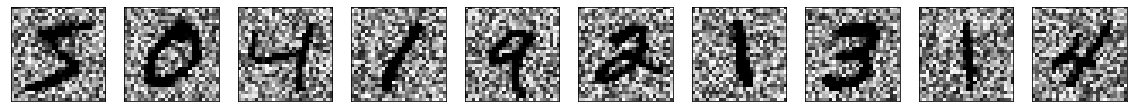

In [ ]:
plot(x_train_noisy, None)

BUILDING AND TRAINING A CLASSIFIER

In [ ]:
classifier = Sequential([
    Dense(256, activation='relu', input_dim=784),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')                     
])
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(x_train, y_train, epochs=3, batch_size=512)

Epoch 1/3
118/118 [==============================] - 2s 16ms/step - loss: 0.4197 - accuracy: 0.8845
Epoch 2/3
118/118 [==============================] - 2s 16ms/step - loss: 0.1551 - accuracy: 0.9546
Epoch 3/3
118/118 [==============================] - 2s 16ms/step - loss: 0.1055 - accuracy: 0.9688


In [ ]:
loss, acc = classifier.evaluate(x_test, y_test)
print(acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1008 - accuracy: 0.9691
0.9690999984741211


In [ ]:
loss, acc = classifier.evaluate(x_test_noisy, y_test)
print(acc)

313/313 [==============================] - 0s 1ms/step - loss: 6.1297 - accuracy: 0.2436
0.243599995970726


BUILDING THE AUTOENCODER

In [ ]:
import keras
from keras import layers
input_image = keras.Input(shape=(784,))
encoded = layers.Dense(64, activation='relu')(input_image)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_image,decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

TRAINING THE AUTOENCODER

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=512,
                verbose=False,
                validation_data=(x_test_noisy, x_test))   

DENOISING IMAGE

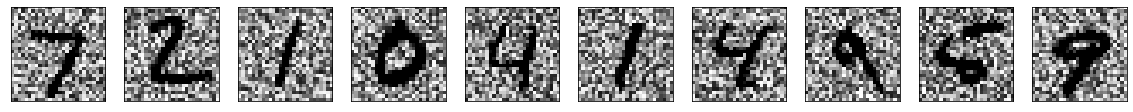

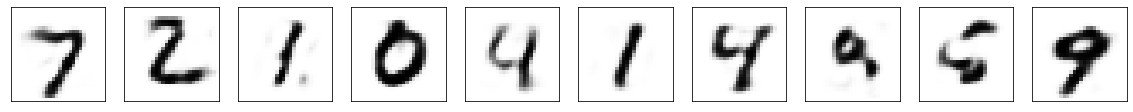

313/313 [==============================] - 0s 1ms/step - loss: 0.1765 - accuracy: 0.9454
0.9453999996185303


In [ ]:
preds = autoencoder.predict(x_test_noisy)
plot(x_test_noisy, None)
plot(preds, None)
loss, acc = classifier.evaluate(preds, y_test)
print(acc)


COMPOSITE MODEL 

In [ ]:
input_image=Input(shape=(784,))
x= autoencoder(input_image)
y=classifier(x)

denoise_and_classify=Model(input_image,y)

In [ ]:
predictions=denoise_and_classify.predict(x_test_noisy)

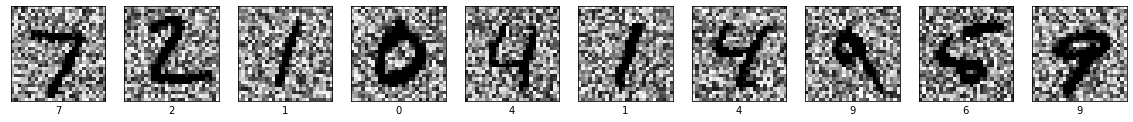

In [ ]:
plot(x_test_noisy,predictions,True)

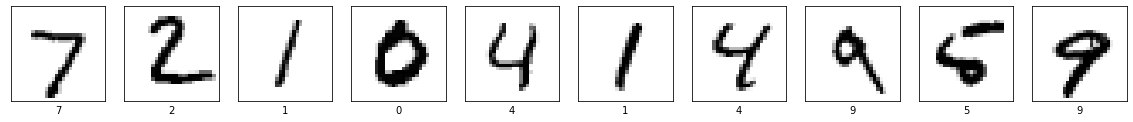

In [ ]:
plot(x_test,to_categorical(y_test),True)